In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import *
from sklearn.manifold import TSNE
from sklearn import cluster
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pd.read_csv("selected_malignant.txt", sep='\t', header=None)
data = df.values[:,4:]
print (data.shape)

(1169, 23686)


In [3]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline

#Scaling the values
X = scale(data)

pca = PCA(n_components=1169)

pca.fit(X)

#variance
var= pca.explained_variance_ratio_

#Cumulative Variance
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

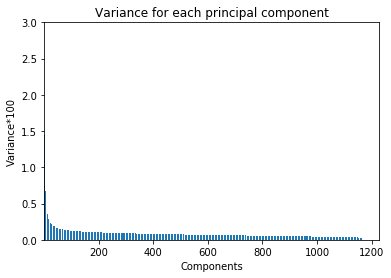

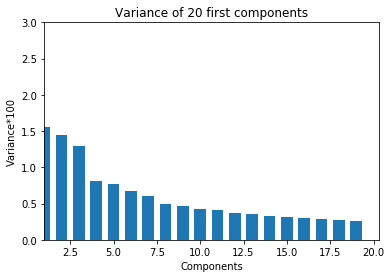

In [4]:
width = 1/1.5
x=np.arange(1169)
plt.bar(x, var*100, width, align='center')
plt.ylim([0,3])  
plt.xlim(xmin=1)
plt.title("Variance for each principal component")
plt.xlabel('Components')
plt.ylabel('Variance*100')
plt.show()

width = 1/1.5
x=np.arange(20)
plt.bar(x, var[:20]*100, width, align='center')
plt.ylim([0,3])   
plt.xlim(xmin=1)
plt.title("Variance of 20 first components")
plt.xlabel('Components')
plt.ylabel('Variance*100')
plt.show()

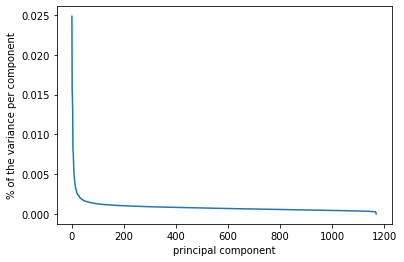

In [5]:
pl.clf()
pl.plot(np.arange(len(pca.explained_variance_ratio_)) + 1, pca.explained_variance_ratio_)
pl.xlabel("principal component")
pl.ylabel("% of the variance per component")
pl.show()

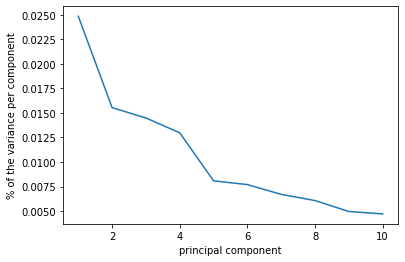

In [6]:
pl.clf()
pl.plot(np.arange(len(pca.explained_variance_ratio_[:10])) + 1, pca.explained_variance_ratio_[:10])
pl.xlabel("principal component")
pl.ylabel("% of the variance per component")
pl.show()

In [7]:
pca = PCA(n_components=8)
pca.fit(data)
X1=pca.fit_transform(data)

print (X1.shape)

(1169, 8)


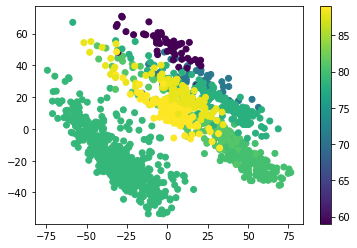

In [8]:
pl.clf()
pl.scatter(X1[:,0], X1[:,1], c= df.values[:,1])
pl.colorbar()
pl.show()

n =  2 , silhouette =  0.6284223652523762
n =  3 , silhouette =  0.5288838086494124
n =  4 , silhouette =  0.4332717764776441
n =  5 , silhouette =  0.4207418506318604
n =  6 , silhouette =  0.417531920566526
n =  7 , silhouette =  0.39267272207310433
n =  8 , silhouette =  0.4184631587875298
n =  9 , silhouette =  0.36542697770673244
n =  10 , silhouette =  0.41176649766197454


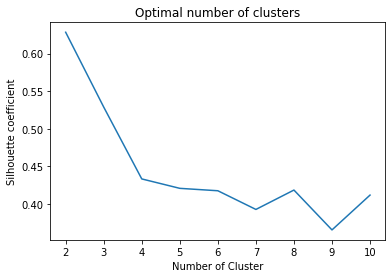

In [9]:
N_small = 1169
coef_s = data[:, np.random.choice (np.arange(data.shape[1]), N_small)][:, :N_small]

ns = [2,3,4,5,6,7,8,9, 10]
ss = []
for n in ns:
    km = cluster.KMeans(n_clusters=n)
    km.fit(np.array(coef_s).transpose())

    labels = km.labels_
    ss.append (metrics.silhouette_score(np.array(coef_s).transpose(), labels))
    print ("n = ", n, ", silhouette = ", ss[-1])
    
pl.plot ()
pl.plot (ns, ss)
pl.title("Optimal number of clusters")
pl.xlabel("Number of Cluster")
pl.ylabel("Silhouette coefficient")
pl.show()

In [10]:
from sklearn.cluster import MeanShift, DBSCAN, SpectralClustering, AgglomerativeClustering
ms = AgglomerativeClustering (n_clusters = 6, connectivity=None)
ms.fit(X1) 

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=6,
                        pooling_func='deprecated')

In [11]:
print (ms.labels_)
import numpy
numpy.savetxt("labels_malignants", ms.labels_, delimiter='\t')

[2 3 5 ... 1 1 1]


<Figure size 432x288 with 0 Axes>

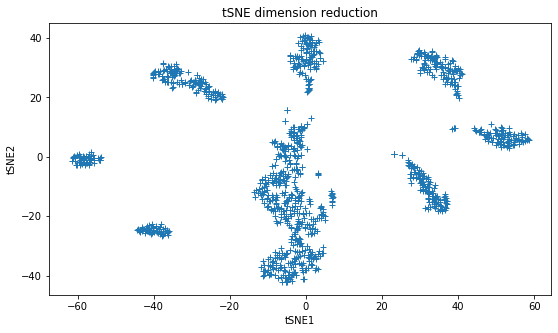

In [12]:
tsne = TSNE(n_components=2)
y_tsne = tsne.fit_transform(X1)
plt.clf()
plt.figure(figsize=(9,5))
plt.title("tSNE dimension reduction")
plt.plot(y_tsne[:,0], y_tsne[:,1], "+")
pl.xlabel("tSNE1")
pl.ylabel("tSNE2")
plt.show()

<Figure size 432x288 with 0 Axes>

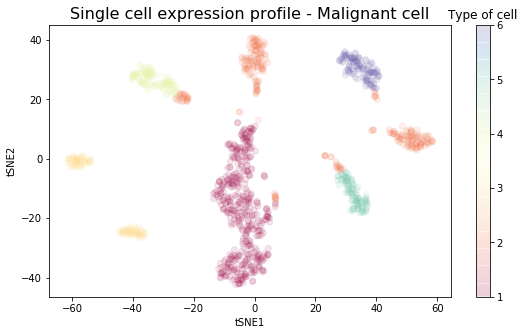

In [13]:
plt.clf()
plt.figure(figsize=(9,5))
plt.scatter(y_tsne[:,0], y_tsne[:,1], c=ms.labels_+1, cmap = plt.cm.Spectral, alpha=0.1)
clb = plt.colorbar()
clb.ax.set_title('Type of cell')
plt.title("Single cell expression profile - Malignant cell", fontsize=16)
pl.xlabel("tSNE1")
pl.ylabel("tSNE2")
plt.show()

<Figure size 432x288 with 0 Axes>

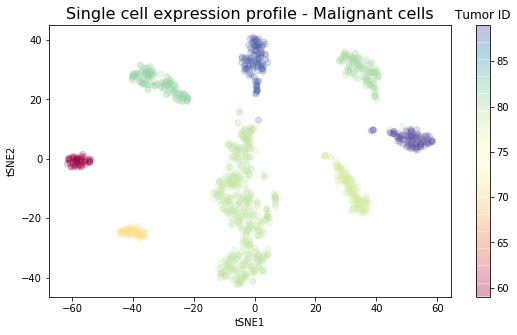

In [14]:
plt.clf()
plt.figure(figsize=(9,5))
plt.scatter(y_tsne[:,0], y_tsne[:,1], c=df.values[:,1], cmap = plt.cm.Spectral, alpha=0.2)
clb = plt.colorbar()
clb.ax.set_title('Tumor ID')
pl.xlabel("tSNE1")
pl.ylabel("tSNE2")
pl.title("Single cell expression profile - Malignant cells", fontsize=16)
plt.show()